# Example of basic plotting

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
sns.set_theme(style="whitegrid", palette="muted")
df_liveticker = pd.read_csv("liveticker.csv")
df_liveticker["timestamp"] = pd.to_datetime(df_liveticker["timestamp"])
df_liveticker = df_liveticker.set_index("timestamp")

In [3]:
df_heartrate = pd.read_csv("HKQuantityTypeIdentifierHeartRate_2022-05-142_21-50-07_SimpleHealthExportCSV.csv", skiprows=1)
timestamp = pd.to_datetime(df_heartrate["startDate"])
df_heartrate.insert(0, "timestamp", timestamp)
df_heartrate = df_heartrate.set_index("timestamp")

In [4]:
df_heartrate = df_heartrate["2022-05-21T18:00:00+00:00" : "2022-05-21T20:47:14+00:00"]
rr_interval = 60000 / df_heartrate["value"]
df_heartrate.insert(4, "rr_interval", rr_interval)



In [5]:
df_heartrate = df_heartrate[["value", "rr_interval"]]

<AxesSubplot:xlabel='timestamp'>

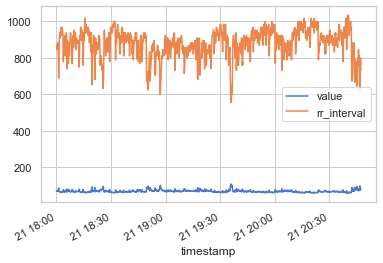

In [6]:
df_heartrate.plot()

In [7]:
df_merged = pd.merge_asof(
    df_heartrate, df_liveticker,
    left_index=True,
    right_index=True,
    tolerance=pd.to_timedelta("1 min"),
    direction="backward"
    )

In [8]:
df_merged.head()

,value,rr_interval,minute,action,is_goal,is_card,relevant_team,halftime,datetime,text
timestamp,,,,,,,,,,
2022-05-21 18:00:03+00:00,69.0,869.565217,1.0,NaN,False,False,NaN,1.0,20:00,Wer gewinnt zum ersten Mal den DFB-Pokal? Der ...
2022-05-21 18:00:04+00:00,69.0,869.565217,1.0,NaN,False,False,NaN,1.0,20:00,Wer gewinnt zum ersten Mal den DFB-Pokal? Der ...
2022-05-21 18:00:11+00:00,69.0,869.565217,1.0,NaN,False,False,NaN,1.0,20:00,Wer gewinnt zum ersten Mal den DFB-Pokal? Der ...
2022-05-21 18:00:17+00:00,70.0,857.142857,1.0,NaN,False,False,NaN,1.0,20:00,Wer gewinnt zum ersten Mal den DFB-Pokal? Der ...
2022-05-21 18:00:22+00:00,71.0,845.070423,1.0,NaN,False,False,NaN,1.0,20:00,Wer gewinnt zum ersten Mal den DFB-Pokal? Der ...


In [9]:
df_merged.to_csv("merged.csv")

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [11]:
x = df_merged.index.values

In [12]:
import numpy as np
rr_interval = df_merged.rr_interval.values
df_merged.is_goal.replace({True: 200, False: 0, np.nan: 0}, inplace=True)
df_merged.is_card.replace({True: 100, False: 0, np.nan: 0}, inplace=True)
df_merged.halftime.replace({1: 100, 2: 100, np.nan: 0}, inplace=True)
liveticker_value = df_merged["is_goal"] + df_merged["is_card"] + df_merged["halftime"]

In [13]:
df_merged["liveticker_value"] = liveticker_value

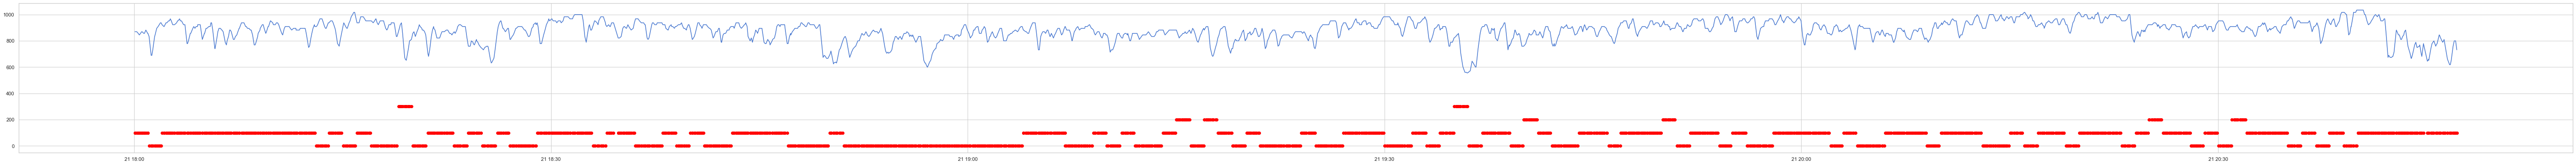

In [14]:
x = df_merged.index.values
x = x.reshape(len(x), 1)
rr_interval = df_merged.rr_interval.values
rr_interval = rr_interval.reshape(len(rr_interval), 1)
liveticker_value = df_merged["liveticker_value"].values
liveticker_value = liveticker_value.reshape(len(liveticker_value), 1)

#sns.set()
plt.rcParams["figure.figsize"] = (100,6)
plt.plot(x, rr_interval)
plt.scatter(x, liveticker_value, c="red")

plt.show()

In [20]:
import json
with open("metadata.json", mode="r") as file:
    metadata = json.load(file)

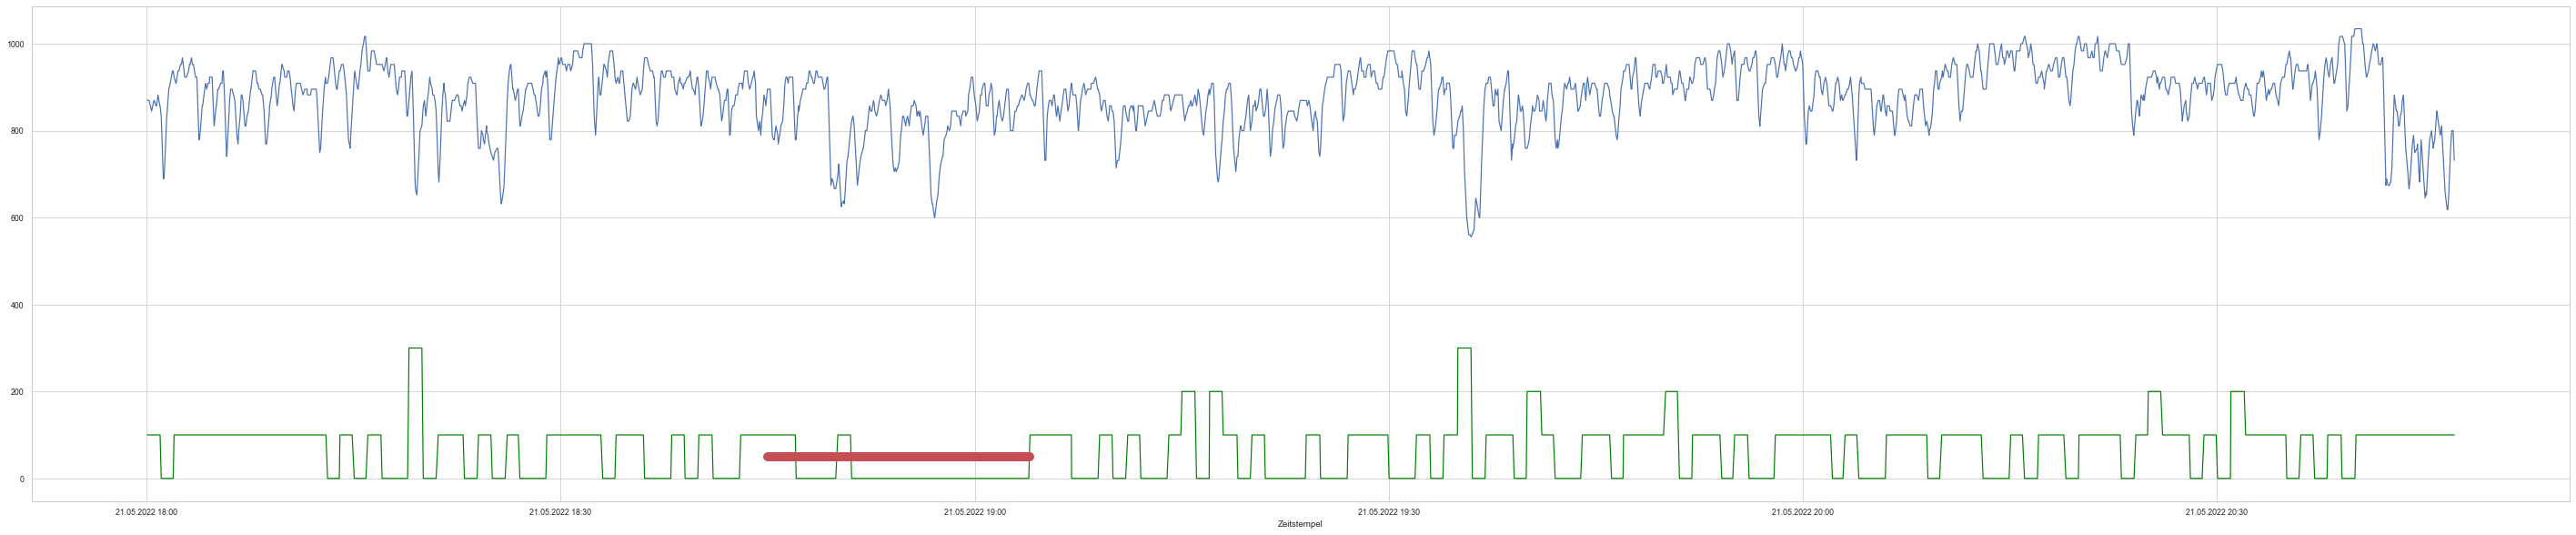

In [35]:
x = df_merged.index.values
x = x.reshape(len(x), 1)
rr_interval = df_merged["rr_interval"].values
rr_interval = rr_interval.reshape(len(rr_interval), 1)
liveticker_value = df_merged["liveticker_value"].values
liveticker_value = liveticker_value.reshape(len(liveticker_value), 1)

sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams["figure.figsize"] = (50,10)
plt.xlabel("Zeitstempel")
plt.plot(x, rr_interval)
plt.plot(x, liveticker_value, c="green")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y %H:%M'))
plt.plot((pd.to_datetime(metadata["break_start"]), pd.to_datetime(metadata["break_end"])), (50,50), c="r", linewidth=10)

plt.show()